In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("mobile_sales_data.csv")
df.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB


In [20]:
df.info()
df.describe()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product                  50000 non-null  object
 1   Brand                    50000 non-null  object
 2   Product Code             50000 non-null  object
 3   Product Specification    50000 non-null  object
 4   Price                    50000 non-null  int64 
 5   Inward Date              50000 non-null  object
 6   Dispatch Date            50000 non-null  object
 7   Quantity Sold            50000 non-null  int64 
 8   Customer Name            50000 non-null  object
 9   Customer Location        50000 non-null  object
 10  Region                   50000 non-null  object
 11  Core Specification       25017 non-null  object
 12  Processor Specification  50000 non-null  object
 13  RAM                      50000 non-null  object
 14  ROM                      50000 non-nul

In [21]:
print(df.isnull().sum())

Product                        0
Brand                          0
Product Code                   0
Product Specification          0
Price                          0
Inward Date                    0
Dispatch Date                  0
Quantity Sold                  0
Customer Name                  0
Customer Location              0
Region                         0
Core Specification         24983
Processor Specification        0
RAM                            0
ROM                            0
SSD                        24983
dtype: int64


In [22]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\aa122\AppData\Local\Temp\ipykernel_19100\3448830320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [25]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

In [26]:
if 'date' in df.columns:
    df['year'] = df['date'].dt.year

In [27]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

In [28]:
print(df.corr(numeric_only=True))

                 Price  Quantity Sold
Price          1.00000       -0.00222
Quantity Sold -0.00222        1.00000


In [29]:
if 'category' in df.columns:
    print(df['category'].value_counts())

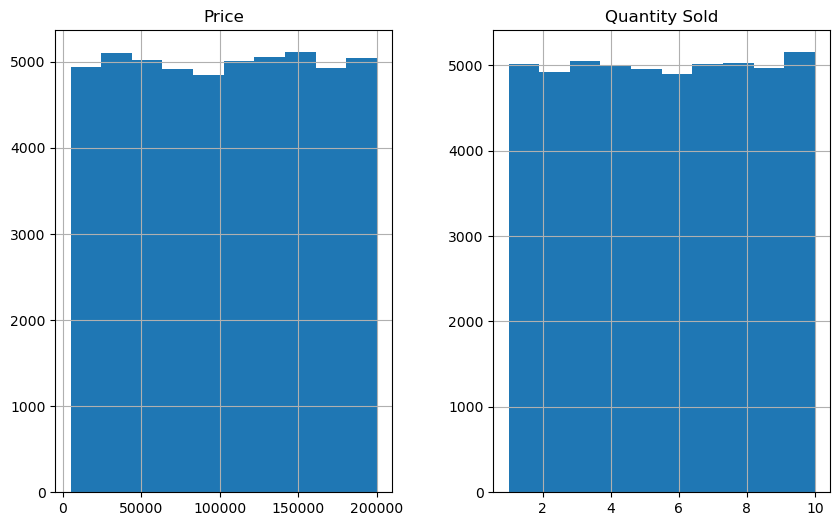

In [39]:
# Histogram for numeric column
df.hist(figsize=(10, 6))
plt.show()




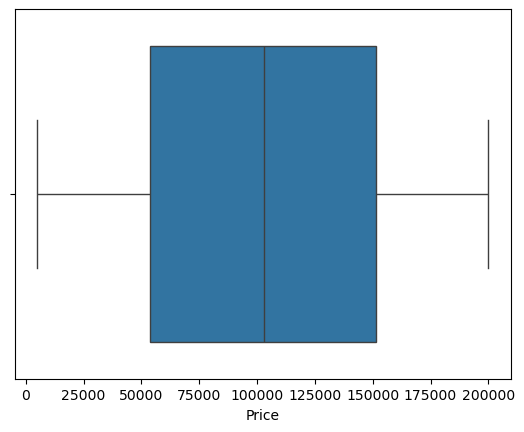

In [37]:
sns.boxplot(x=df.select_dtypes(include='number').columns[0], data=df)
plt.show()


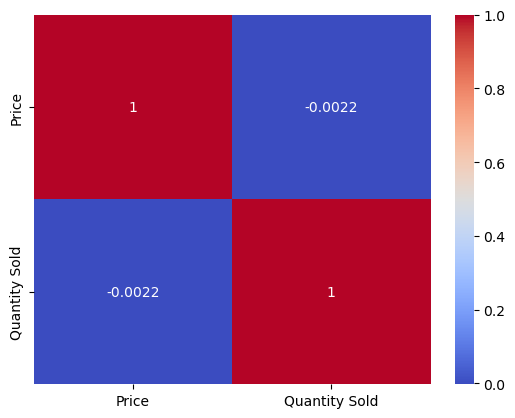

In [38]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()



In [40]:
# Correlation matrix
print(df.corr(numeric_only=True))

# Value counts for categorical column
if 'category' in df.columns:
    print(df['category'].value_counts())


                 Price  Quantity Sold
Price          1.00000       -0.00222
Quantity Sold -0.00222        1.00000


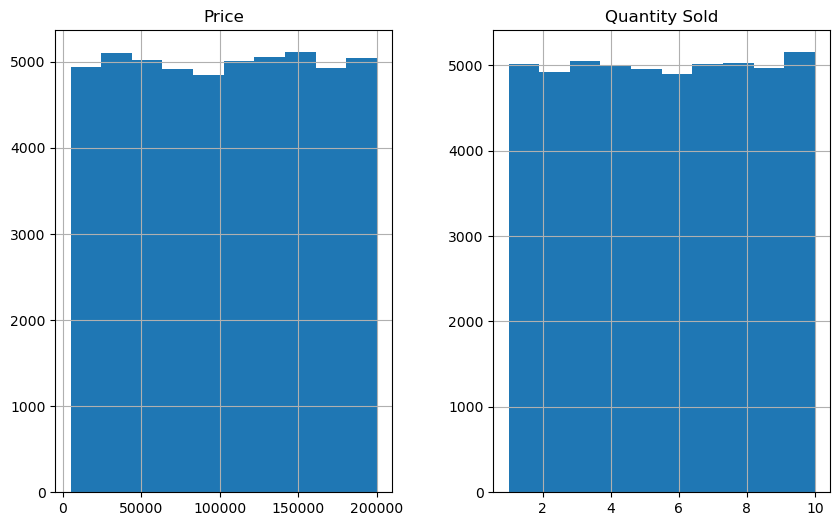

In [44]:
# Histogram for numeric column
df.hist(figsize=(10, 6))
plt.show()



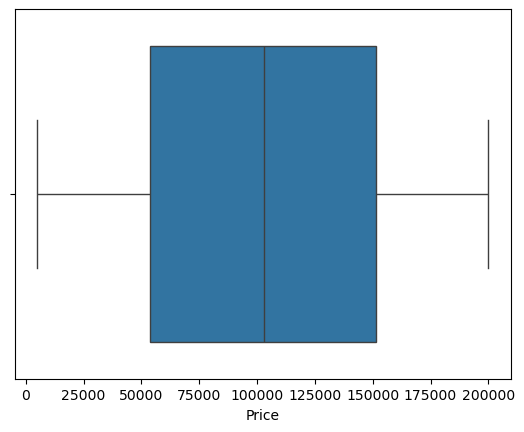

In [42]:
# Boxplot for outlier detection
sns.boxplot(x=df.select_dtypes(include='number').columns[0], data=df)
plt.show()

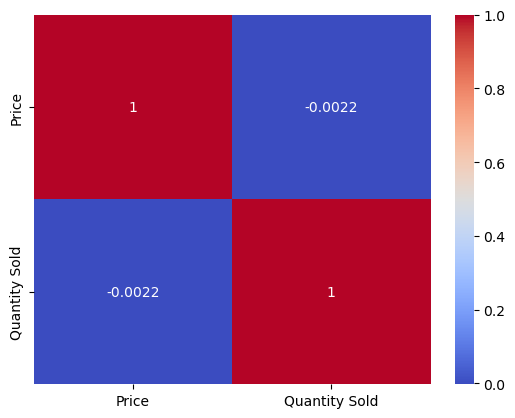

In [43]:
# Heatmap for correlations
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [47]:
print(df.columns)


Index(['Price', 'Quantity Sold', 'Product_mobile phone', 'Brand_apple',
       'Brand_asus', 'Brand_dell', 'Brand_google', 'Brand_hp', 'Brand_huawei',
       'Brand_iqoo',
       ...
       'RAM_4gb', 'RAM_6gb', 'RAM_8gb', 'ROM_1tb', 'ROM_256gb', 'ROM_512gb',
       'ROM_64gb', 'SSD_256gb', 'SSD_2tb', 'SSD_512gb'],
      dtype='object', length=166732)
